In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import datetime
from scipy import stats
import re
import nltk
import math
import pickle

%matplotlib inline

## Univariate and Bivariate Analysis: Understanding the Target Variable


### Objective:

### - Explore the target variable to check for missing and unique values.
### - Establish the feature importance of both categorical and numerical variables with regard to the target variable.

### Load the data as a csv file

In [2]:
# data downloaded from kaggle https://www.kaggle.com/jsphyg/weather-dataset-rattle-package
df_weather = pd.read_csv('weatherAUS.csv')

In [3]:
df_weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df_weather.shape

(145460, 23)

In [5]:
df_weather.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [6]:
df_weather.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [7]:
df_weather.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

### Drop the 'RainToday' column from the dataframe: Most likely the project will involve predicting if it rains tomorrow rather than today

In [8]:
df_weather.drop(['RainToday'], axis=1,inplace=True)

### 1. find out whether the target variable (“Rain_Tomorrow”) is categorical or numerical.

In [9]:
df_weather.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainTomorrow      object
dtype: object

In [10]:
# convert 'RainTomorrow' from object to category data type
df_weather['RainTomorrow'] = df_weather['RainTomorrow'].astype('category')

In [11]:
df_weather.dtypes

Date               object
Location           object
MinTemp           float64
MaxTemp           float64
Rainfall          float64
Evaporation       float64
Sunshine          float64
WindGustDir        object
WindGustSpeed     float64
WindDir9am         object
WindDir3pm         object
WindSpeed9am      float64
WindSpeed3pm      float64
Humidity9am       float64
Humidity3pm       float64
Pressure9am       float64
Pressure3pm       float64
Cloud9am          float64
Cloud3pm          float64
Temp9am           float64
Temp3pm           float64
RainTomorrow     category
dtype: object

In [12]:
df_weather.columns[df_weather.isna().any()].tolist()

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainTomorrow']

In [13]:
# count the Nan values for each column in dataframe
df_weather.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainTomorrow      3267
dtype: int64

### There are a lot on Nan values in almost all the columns: How to deal with this issue?

In [14]:
# determne the unique values in target variable,'RainTomorrow'
print(df_weather['RainTomorrow'].unique().tolist())

['No', 'Yes', nan]


In [15]:
# Get the frequency distribution of values
counts = df_weather['RainTomorrow'].value_counts().to_dict()
print(counts)

{'No': 110316, 'Yes': 31877}


In [16]:
# Evaluate the percentage of the frequency distribution for each label.
relative_frequencies = df_weather['RainTomorrow'].value_counts(normalize=True)
print(relative_frequencies)

No     0.775819
Yes    0.224181
Name: RainTomorrow, dtype: float64


### Convert  yes/no labels to integers 1/0 to make calculations easier.

In [17]:
# Before converting to integers
df_weather.RainTomorrow.value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [18]:
#df_weather.RainTomorrow.replace(('Yes', 'No'), (1, 0), inplace=True) 
df_weather['RainTomorrow'] = df_weather['RainTomorrow'].map({'Yes': 1, 'No': 0})

In [19]:
# After converting to integers
df_weather.RainTomorrow.value_counts()

0.0    110316
1.0     31877
Name: RainTomorrow, dtype: int64

### Create Month, Day, Year columns for dataframe

In [20]:
# Covert 'Date' column to a datetime object
df_weather['Date'] = df_weather['Date'].astype('datetime64')

/Users/scottlew/anaconda2/envs/py3/lib/python3.6/site-packages/pandas/core/internals.py:3462: FutureWarning: Passing in 'datetime64' dtype with no frequency is deprecated and will raise in a future version. Please pass in 'datetime64[ns]' instead.
  return self.apply('astype', dtype=dtype, **kwargs)


In [21]:
df_weather.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainTomorrow            float64
dtype: object

In [22]:
df_weather['month'] = df_weather.Date.dt.month

In [23]:
df_weather['day'] = df_weather.Date.dt.day

In [24]:
df_weather['year'] = df_weather.Date.dt.year

In [25]:
# sanity check on new day, month, year columns in dataframe
df_weather[['Date','year','month','day']].tail(10)

,Date,year,month,day
145450,2017-06-16,2017,6,16
145451,2017-06-17,2017,6,17
145452,2017-06-18,2017,6,18
145453,2017-06-19,2017,6,19
145454,2017-06-20,2017,6,20
145455,2017-06-21,2017,6,21
145456,2017-06-22,2017,6,22
145457,2017-06-23,2017,6,23
145458,2017-06-24,2017,6,24
145459,2017-06-25,2017,6,25


### Drop original 'Date' column from dataframe

In [26]:
df_weather.drop(['Date'], axis=1,inplace=True)

In [27]:
df_weather.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainTomorrow     float64
month              int64
day                int64
year               int64
dtype: object

In [28]:
df_weather.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainTomorrow     float64
month              int64
day                int64
year               int64
dtype: object

### 1. Segregate the categorical attributes in a separate dataframe to analyze:

In [29]:
# select non-numerical columns with select_dtypes()
df_cat = df_num =  df_weather.select_dtypes(exclude = 'number')

In [30]:
df_cat.dtypes

Location       object
WindGustDir    object
WindDir9am     object
WindDir3pm     object
dtype: object

### Nan values in categorical columns

In [31]:
# count the Nan values for each column in dataframe
df_cat.isna().sum()

Location           0
WindGustDir    10326
WindDir9am     10566
WindDir3pm      4228
dtype: int64

In [32]:
# determine the number of unique values for each category column
for item in list(df_cat.columns):
    print(item)
    #print(df_cat[item].value_counts().sum())
    print(df_cat[item].unique().tolist())
    # subtract 1 from length of list of unique values to account for nan being counted as value
    print(len(df_cat[item].unique().tolist())-1)
    print()

Location
['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree', 'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond', 'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown', 'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat', 'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura', 'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns', 'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa', 'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport', 'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston', 'AliceSprings', 'Darwin', 'Katherine', 'Uluru']
48

WindGustDir
['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', nan, 'ENE', 'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW']
16

WindDir9am
['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', nan, 'SSW', 'N', 'WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE']
16

WindDir3pm
['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW', 'SW', 'SE', 'N', 'S', 'NNE', nan, 'NE']
16



### 2. Segregate the numerical attributes to analyze them separately:

In [33]:
df_num =  df_weather.select_dtypes(include='number')

In [34]:
df_num.dtypes

MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustSpeed    float64
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainTomorrow     float64
month              int64
day                int64
year               int64
dtype: object

### 3. Identify the potential columns for outliers:

In [35]:
df_num.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainTomorrow', 'month', 'day', 'year'],
      dtype='object')

In [36]:
#df_num.drop(['month','day','year'], axis=1,inplace=True)

In [37]:
my_columns = list(df_num.columns)
print(my_columns)
print()
print(type(my_columns))
print(len(my_columns))

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainTomorrow', 'month', 'day', 'year']

<class 'list'>
20


In [38]:
# count the Nan values for each column in dataframe
df_num.isna().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainTomorrow      3267
month                0
day                  0
year                 0
dtype: int64

In [39]:
df_num.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow,month,day,year
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000,142193.000000,145460.000000,145460.000000,145460.000000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339,0.224181,6.399615,15.712258,2012.769751
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665,0.417043,3.427262,8.794789,2.537684
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000,0.000000,1.000000,1.000000,2007.000000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000,0.000000,3.000000,8.000000,2011.000000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000,0.000000,6.000000,16.000000,2013.000000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000,0.000000,9.000000,23.000000,2015.000000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000,1.000000,12.000000,31.000000,2017.000000


### Boxplots of Numerical Data

In [40]:
# useful code taken from https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.boxplot.html

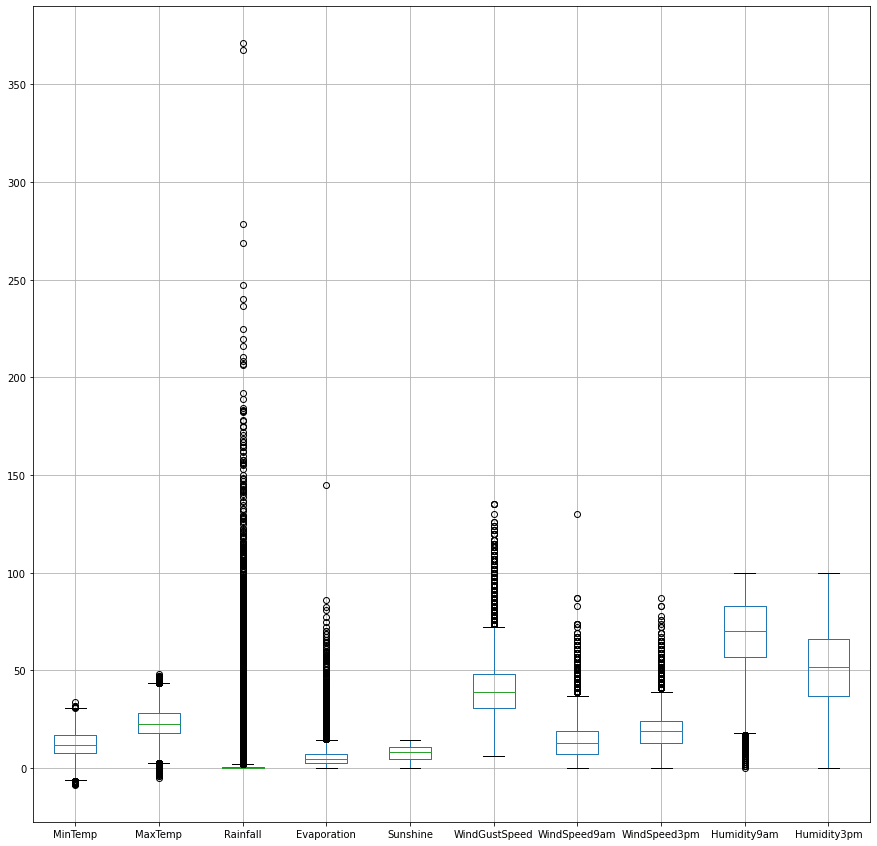

In [41]:
plt.figure(figsize=(15,15))
boxplot = df_num.boxplot(column= my_columns[0:10])

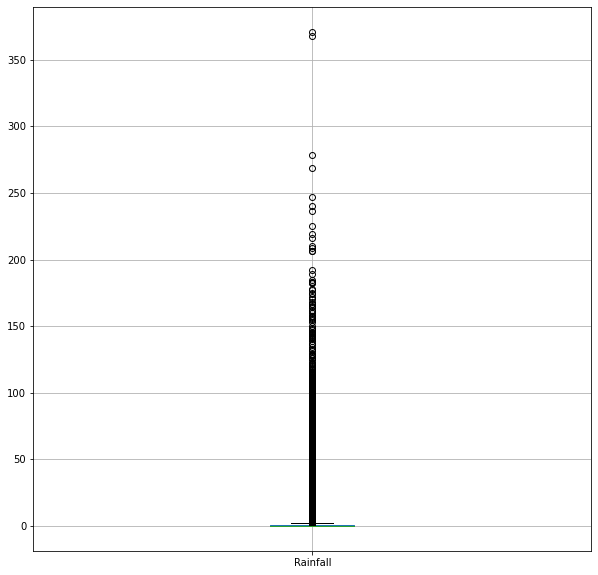

In [42]:
plt.figure(figsize=(10,10))
boxplot = df_num.boxplot(column= ['Rainfall'])

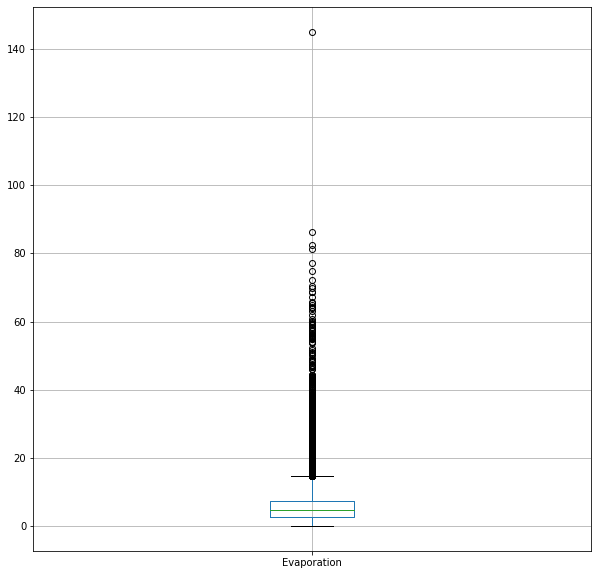

In [43]:
plt.figure(figsize=(10,10))
boxplot = df_num.boxplot(column= ['Evaporation'])

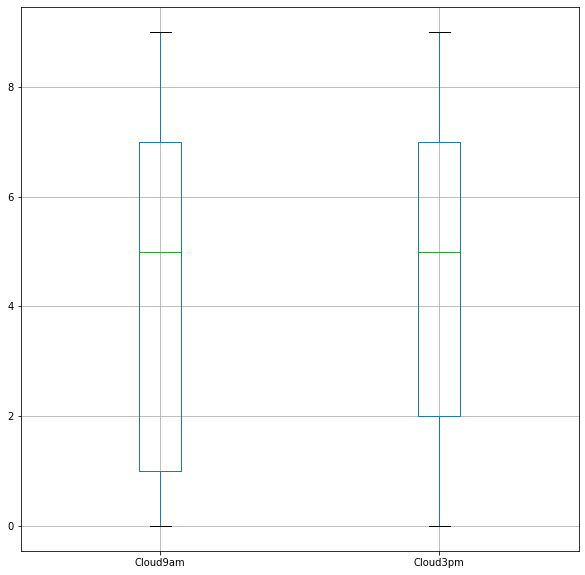

In [44]:
plt.figure(figsize=(10,10))
#boxplot = df_num.boxplot(column= my_columns[11:20])
boxplot = df_num.boxplot(column= my_columns[12:14])

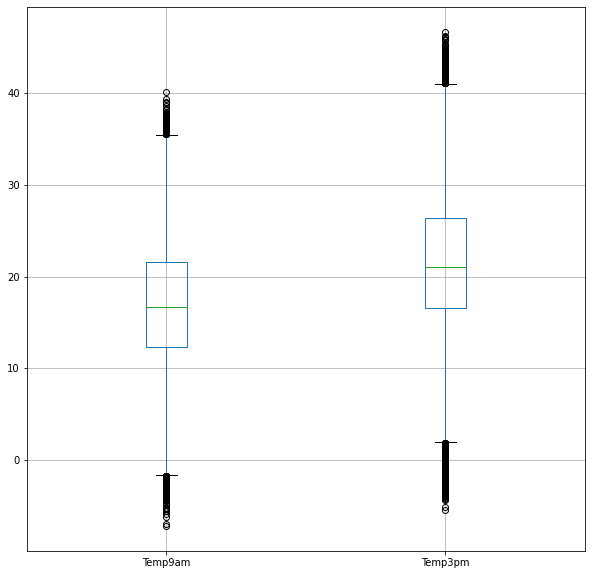

In [45]:
plt.figure(figsize=(10,10))
#boxplot = df_num.boxplot(column= my_columns[11:20])
boxplot = df_num.boxplot(column= my_columns[14:16])

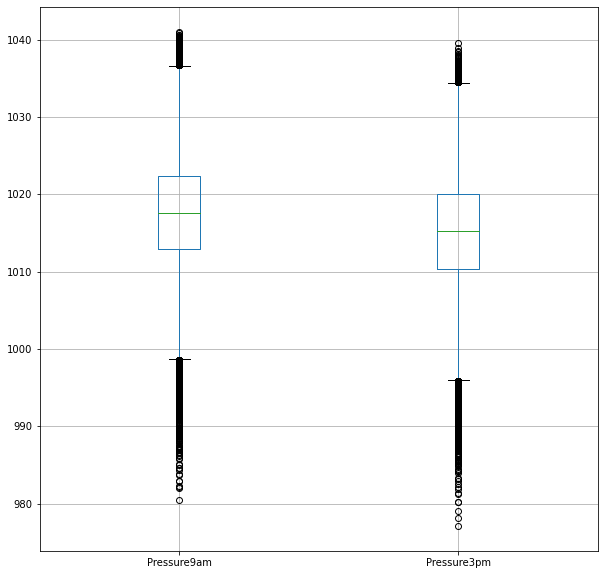

In [46]:
plt.figure(figsize=(10,10))
#boxplot = df_num.boxplot(column= my_columns[11:20])
boxplot = df_num.boxplot(column= ['Pressure9am', 'Pressure3pm'])

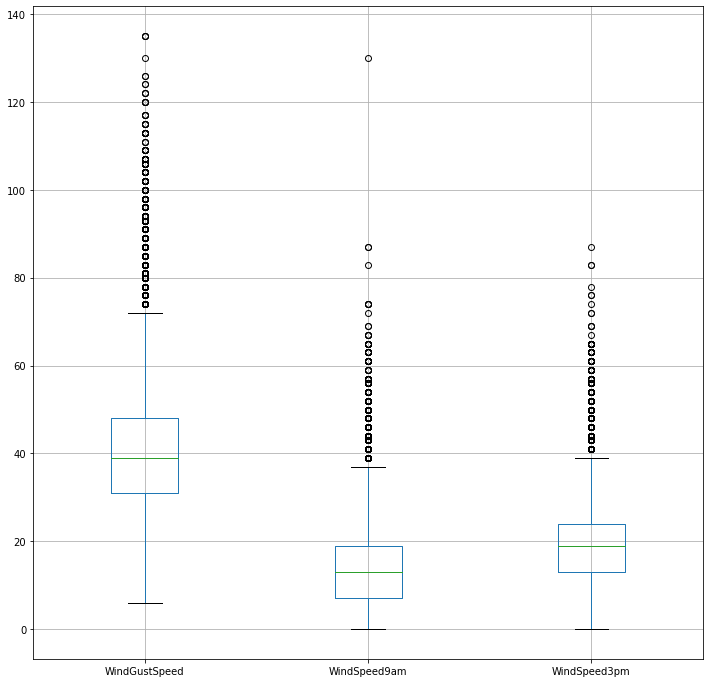

In [47]:
# boxplot of 'WindGustSpeed', 'WindSpeed9am' & 'WindSpeed3pm', on one graph
plt.figure(figsize=(12,12))
boxplot = df_num.boxplot(column= ['WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm'])

### create outlier column for each numerical feature in dataframe using a threshhold value and 
### np.select(condlist,choicelist )

In [48]:
threshhold_value = 2.5

choicelist = [0,0,1,1]
# use np.select(condlist,choicelist) to create outlier column, 1 if z score is greater than threshhold value
# else 0, np.select(condlist,choicelist) can process a whole series or column: very valuable
for col in my_columns:
    col_outlier = col + '_outlier'
    col_zscore = col + '_zscore'
    z_score = (df_num[col] - df_num[col].mean())/df_num[col].std(ddof=0)
    condlist = [z_score == np.NaN,z_score < threshhold_value,z_score >= threshhold_value,z_score >= -1*threshhold_value]
    df_num[col_outlier] = np.select(condlist,choicelist)
    
        
    df_num[col_zscore] = z_score
    
    

/Users/scottlew/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/scottlew/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [49]:
df_num.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainTomorrow', 'month', 'day', 'year',
       'MinTemp_outlier', 'MinTemp_zscore', 'MaxTemp_outlier',
       'MaxTemp_zscore', 'Rainfall_outlier', 'Rainfall_zscore',
       'Evaporation_outlier', 'Evaporation_zscore', 'Sunshine_outlier',
       'Sunshine_zscore', 'WindGustSpeed_outlier', 'WindGustSpeed_zscore',
       'WindSpeed9am_outlier', 'WindSpeed9am_zscore', 'WindSpeed3pm_outlier',
       'WindSpeed3pm_zscore', 'Humidity9am_outlier', 'Humidity9am_zscore',
       'Humidity3pm_outlier', 'Humidity3pm_zscore', 'Pressure9am_outlier',
       'Pressure9am_zscore', 'Pressure3pm_outlier', 'Pressure3pm_zscore',
       'Cloud9am_outlier', 'Cloud9am_zscore', 'Cloud3pm_outlier',
       'Cloud3pm_zscore', 'Temp9am_outlier', 'Temp9am_zscore',
       'Tem

In [50]:
df_num[['WindGustSpeed','WindGustSpeed_zscore','WindGustSpeed_outlier']].head(15)

,WindGustSpeed,WindGustSpeed_zscore,WindGustSpeed_outlier
0,44.0,0.291377,0
1,44.0,0.291377,0
2,46.0,0.438360,0
3,24.0,-1.178453,0
4,41.0,0.070902,0
5,56.0,1.173275,0
6,50.0,0.732326,0
7,35.0,-0.370047,0
8,80.0,2.937072,1
9,28.0,-0.884487,0


In [51]:
df_num[['WindSpeed9am','WindSpeed9am_zscore','WindSpeed9am_outlier']].tail(10)

,WindSpeed9am,WindSpeed9am_zscore,WindSpeed9am_outlier
145450,11.0,-0.341369,0
145451,15.0,0.107295,0
145452,19.0,0.555960,0
145453,15.0,0.107295,0
145454,15.0,0.107295,0
145455,13.0,-0.117037,0
145456,13.0,-0.117037,0
145457,9.0,-0.565702,0
145458,13.0,-0.117037,0
145459,17.0,0.331628,0


In [52]:
df_num[df_num.WindSpeed9am_outlier == 1][['WindSpeed9am','WindSpeed9am_zscore','WindSpeed9am_outlier']].head(10)

,WindSpeed9am,WindSpeed9am_zscore,WindSpeed9am_outlier
299,37.0,2.574951,1
2462,37.0,2.574951,1
3223,37.0,2.574951,1
3308,48.0,3.808779,1
3693,39.0,2.799283,1
5050,44.0,3.360114,1
5293,37.0,2.574951,1
9104,39.0,2.799283,1
9147,43.0,3.247948,1
9198,41.0,3.023616,1


### 4. Calculate the IQR, or Interquartile Range, for the shortlisted columns:

In [53]:
# from https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
#print(IQR)

In [54]:
for col in my_columns:
    col_lower = col +'_lower'
    col_upper = col +'_upper'
    col_iqr = col + '_IQR'
    Q1_col = df_num[col].quantile(0.25)
    Q3_col = df_num[col].quantile(0.75)
    IQR_col = Q3_col - Q1_col
    df_num[col_iqr] = IQR_col
    df_num[col_lower] = Q1_col
    df_num[col_upper] = Q3_col

In [55]:
my_columns = df_num.columns
outlier_list  = [col for col in df_num.columns if '_outlier' in col]
    
print()
print(outlier_list)
print()


['MinTemp_outlier', 'MaxTemp_outlier', 'Rainfall_outlier', 'Evaporation_outlier', 'Sunshine_outlier', 'WindGustSpeed_outlier', 'WindSpeed9am_outlier', 'WindSpeed3pm_outlier', 'Humidity9am_outlier', 'Humidity3pm_outlier', 'Pressure9am_outlier', 'Pressure3pm_outlier', 'Cloud9am_outlier', 'Cloud3pm_outlier', 'Temp9am_outlier', 'Temp3pm_outlier', 'RainTomorrow_outlier', 'month_outlier', 'day_outlier', 'year_outlier']



In [56]:
len(df_num.columns)

120

### Calculate the IQR, or Interquartile Range, for the shortlisted columns:

### Print the lower and upper bounds for each of the columns.

In [57]:
shortlist = []

for item in outlier_list:
    # iterare over outlier_lilst
    if 1 in df_num[item].unique():
        #if outlier value ==1, append column name to list short list
        shortlist.append(item)
    

In [58]:
print(shortlist)
print()
print(len(shortlist))
print()

['MinTemp_outlier', 'MaxTemp_outlier', 'Rainfall_outlier', 'Evaporation_outlier', 'WindGustSpeed_outlier', 'WindSpeed9am_outlier', 'WindSpeed3pm_outlier', 'Pressure9am_outlier', 'Pressure3pm_outlier', 'Temp9am_outlier', 'Temp3pm_outlier']

11



In [59]:
# process column names having outliers with split()
shortlist_2 = []
for col in shortlist:
    print(col.split('_')[0])
    shortlist_2.append(col.split('_')[0])
    print()

MinTemp

MaxTemp

Rainfall

Evaporation

WindGustSpeed

WindSpeed9am

WindSpeed3pm

Pressure9am

Pressure3pm

Temp9am

Temp3pm



In [60]:
print(shortlist_2)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']


In [69]:
print('The Numerical columns in weather data with outliers')
print('Z-score greater than threshhold value of ' + str(threshhold_value)+':')
print()

for col in shortlist_2:
    print(col)
    print('Lower bound: ' + str(df_num[col+'_lower'][0]))
    print('Upper bound: ' +str(df_num[col+'_upper'][0]))
    print('IQR: ' +str(df_num[col+'_IQR'][0]))
    print()

The Numerical columns in weather data with outliers
Z-score greater than threshhold value of 2.5:

MinTemp
Lower bound: 7.6
Upper bound: 16.9
IQR: 9.299999999999999

MaxTemp
Lower bound: 17.9
Upper bound: 28.2
IQR: 10.3

Rainfall
Lower bound: 0.0
Upper bound: 0.8
IQR: 0.8

Evaporation
Lower bound: 2.6
Upper bound: 7.4
IQR: 4.800000000000001

WindGustSpeed
Lower bound: 31.0
Upper bound: 48.0
IQR: 17.0

WindSpeed9am
Lower bound: 7.0
Upper bound: 19.0
IQR: 12.0

WindSpeed3pm
Lower bound: 13.0
Upper bound: 24.0
IQR: 11.0

Pressure9am
Lower bound: 1012.9
Upper bound: 1022.4
IQR: 9.5

Pressure3pm
Lower bound: 1010.4
Upper bound: 1020.0
IQR: 9.600000000000023

Temp9am
Lower bound: 12.3
Upper bound: 21.6
IQR: 9.3

Temp3pm
Lower bound: 16.6
Upper bound: 26.4
IQR: 9.799999999999997



In [62]:
df_num[['Rainfall','Rainfall_zscore','Rainfall_lower','Rainfall_IQR','Rainfall_upper']].head(5)

,Rainfall,Rainfall_zscore,Rainfall_lower,Rainfall_IQR,Rainfall_upper
0,0.6,-0.207704,0.0,0.8,0.8
1,0.0,-0.278475,0.0,0.8,0.8
2,0.0,-0.278475,0.0,0.8,0.8
3,0.0,-0.278475,0.0,0.8,0.8
4,1.0,-0.160523,0.0,0.8,0.8


In [63]:
df_num[['WindGustSpeed','WindGustSpeed_zscore','WindGustSpeed_lower','WindGustSpeed_IQR','WindGustSpeed_upper']].head(5)

,WindGustSpeed,WindGustSpeed_zscore,WindGustSpeed_lower,WindGustSpeed_IQR,WindGustSpeed_upper
0,44.0,0.291377,31.0,17.0,48.0
1,44.0,0.291377,31.0,17.0,48.0
2,46.0,0.438360,31.0,17.0,48.0
3,24.0,-1.178453,31.0,17.0,48.0
4,41.0,0.070902,31.0,17.0,48.0


In [64]:
#df_num.to_csv('num_data.csv')

In [65]:
#df_cat.to_csv('categor_data.csv')